<a href="https://colab.research.google.com/github/kimberlydriscoll/bayesCourse/blob/master/BayesRule_Pathstream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

#An Introduction to Bayes' Rule

---
What's Bayes' Rule, you ask? Well, simply, *simply* put, it's a formula used in probability and statistics that helps us become less wrong in our assumptions about a situation as we get additional data about that situation.  

It looks a little something like this:

$$ P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$

And if you're looking at that formula and feeling a little faint, grab a glass of water and settle in. This course will get you all of the information you need to get started.


##But First, Why?
---
**Bayes' Rule**, also known as Bayes' Theorem, is an important mathematical formula that makes up the the basis of Bayesian Statistics. Its importance is based off the fact that it accounts, not just for the probability of what we're measuring, but also the effect of new evidence on the possible outcome. You might need this formula if you...
* are entering the field of statistics and/or probability
* want to get good at Machine Learning
* are going into a field where diagnostic tests are important
* like refining your ideas after you get new information

Bayes' Rule is used formally in a lot of places, but you'll find that Bayes' Rule often puts to formula the way that humans think more generally. Let's say it's 11pm and you're walking upstairs at your house really quietly because you're pretty positive that your kids are asleep. As you head up the stairs, you hear giggling. Given that you hear the giggles, you update your previous assumption (that they're asleep like little angels) to a new, more likely hypothesis, that the kiddos are awake on the other side of the bedroom door. That thought process is a simple application of Bayes' Rule. See? Not so terrifying. *Let's dig in!*



##Getting the Most out of this Lesson:
In this project, we're going to take a look at Bayes' Rule, also called Bayes' Theory. To do this, you'll need to feel comfortable with some vocabulary and principles from probability and statistics. If it's been a while since you've stretched those muscles, make sure to dig into the "[Getting Started](https://colab.research.google.com/drive/1Ntln3vZxKzoGyZ_ZxE16dLbxGhq_6Kty#scrollTo=7S_2z-rWznLg&line=6&uniqifier=1)" section before you move onto the examples.

#Getting Started!


---

**Bayes' Rule**, also known as Bayes' Theorem, is an important mathematical formula that makes up the the basis of Bayesian Statistics. Its importance is based off the fact that it accounts, not just for the probability of what we're measuring but also the effect of new evidence on the possible outcome. Below are some basic vocabulary terms used throughout the course:

**Conditional Probability** is the likelihood that event "A" happens given that item "B" is true. Bayes' is built off of conditional probability. 

**Frequentist statistics** is a sect of statistics based on how frequently something happens in a given sample set. Bayes' is **not** frequentist.

**Prior** is the term used to describe our initial belief (the "first" belief, assumption, or hypothesis) in Bayes' Rule. Below, *P(A)* represents the prior. Stated in plain English, it is "our belief in the probability of event A."" 

$$ P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$

**Posterior Belief** is the term used to describe the lefthand side of Bayes' Rule, or the outcome of the equation. Above, *P(A|B)* represents the posterior. Stated in plain English, it is "the probability of event A given what we know about event B.""

**Reading equations "in English"** is one of the simplest ways to make a convoluted equation of letters make more sense. Here are some shorthand phrases you might use throughout the rest of the course:
* **P(A)** is the probability that event "A" will happen
* **P(A|B)** is the probability that event "A" will happen given what we know about event B.
* **P(B|A)** is the probability that event "B" will happen given what we know about event A.
* **P(A∩B)** is the probability of event A *and* event B.
* **P(A∪B)** is the probability of event A *or* event B.

Bayes' also allows us to **eliminate probability mass** from consideration, which essentially means that we throw out (no longer compute) the stuff that we know not to be true. 



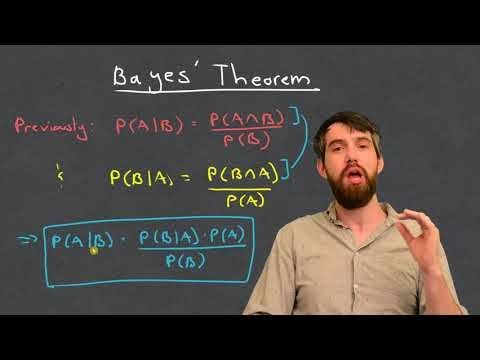

In [3]:
#@title Beginning with Bayes' { display-mode: "form" }
#@markdown This quick video from YouTube will give you an overview of how Bayes' Rule works.
from IPython.display import YouTubeVideo
YouTubeVideo('XQoLVl31ZfQ', width=600, height=400)

#Bayes' Rule in its Simplest Form
Let's start off with flipping some coins. But, since we have Bayes' Rule to help us, let's flip *two* coins. Our assumptions, or our *prior* belief is that one coin is a good coin, meaning one side is heads and one side is tails. The other coin is a tricky coin, meaning *both sides* are heads. Now, at random, someone picks up a coin and flips it. Below, we can see all of the possible options.

**Choose heads or tails from the dropdown below & run that block to see all possible outcomes.**

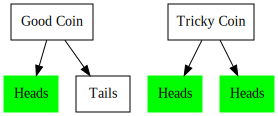

In [106]:
from graphviz import Digraph

styles = {
    'top': {'shape': 'rect', 'style': 'filled', 'color': 'white'},
    'tails':  {'shape': 'rect', 'style': 'filled', 'color': 'red'},
    'heads': {'shape': 'rect', 'style': 'filled', 'color': 'green'},
    'qst': {'shape': 'rect'}
}

example_tree = Digraph()

#example_tree.node('top', 'Coin', styles['top'])
example_tree.node('q1', 'Good Coin', styles['qst'])

example_tree.node('h1', 'Heads', styles['qst'])
example_tree.node('t1', 'Tails', styles['qst'])

example_tree.node('q2', 'Tricky Coin', styles['qst'])

example_tree.node('bh1', 'Heads', styles['qst'])
example_tree.node('trick1', 'Heads', styles['qst'])

#example_tree.node('q3', 'Is the lecture early in the morning?', styles['qst'])
#example_tree.node('no2', 'No ', styles['no'])

#example_tree.node('no3', 'No ', styles['no'])
#example_tree.node('yes', 'Yes', styles['yes'])

#example_tree.edge('top', 'q1')

example_tree.edge('q1', 'h1')
example_tree.edge('q1', 't1')

example_tree.edge('q2', 'bh1')
example_tree.edge('q2', 'trick1')

#example_tree.edge('q2', 'q3', 'Yes')
#example_tree.edge('q2', 'no2', 'No')

#example_tree.edge('q3', 'no3', 'Yes')
#example_tree.edge('q3', 'yes', 'No')

run: "auto"
flipcoin = "heads" #@param ["heads", "tails"]
if flipcoin == 'heads':
  example_tree.node('bh1', 'Heads', styles['heads'])
  example_tree.node('h1', 'Heads', styles['heads'])
  example_tree.node('trick1', 'Heads', styles['heads'])
  example_tree.node('t1', 'Tails', styles['qst'])
elif flipcoin == 'tails':
  example_tree.node('t1', 'Tails', styles['tails'])
  example_tree.node('bh1', 'Heads', styles['qst'])
  example_tree.node('h1', 'Heads', styles['qst'])
  example_tree.node('trick1', 'Heads', styles['qst'])
  
example_tree

##Heads!
Now, an assumption we'll make is that the person calls heads. In Bayes' Rule, we'll call this our *prior.* We can now eliminate probability mass from our equation, meaning we can throw out all possibility of tails (again, because we *know* that the individual has called heads). But we want to know - **how likely is it that we're holding the good coin?**

Let's put it into our formula to start figuring it out:

We want to know the probability of "goodCoin" given "calledHeads".

$$ P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$

Let's try it out in our formula:

$$ \frac{P(calledHeads|goodCoin)*P(goodCoin)}{P(calledHeads)}$$

and see it in action:

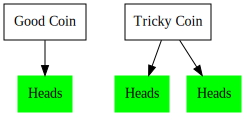

In [99]:
#@title Once we call heads... { run: "auto", vertical-output: true, display-mode: "form" }
styles = {
    'top': {'shape': 'rect', 'style': 'filled', 'color': 'white'},
    'tails':  {'shape': 'rect', 'style': 'filled', 'color': 'red'},
    'heads': {'shape': 'rect', 'style': 'filled', 'color': 'green'},
    'qst': {'shape': 'rect'}
}

example_tree = Digraph()

#example_tree.node('top', 'Coin', styles['top'])
example_tree.node('q1', 'Good Coin', styles['qst'])

example_tree.node('h1', 'Heads', styles['heads'])

example_tree.node('q2', 'Tricky Coin', styles['qst'])

example_tree.node('bh1', 'Heads', styles['heads'])
example_tree.node('trick1', 'Heads', styles['heads'])


example_tree.edge('q1', 'h1')

example_tree.edge('q2', 'bh1')
example_tree.edge('q2', 'trick1')



example_tree


###What would the probability be?

We want to know the probability of "goodCoin" given "calledHeads".

$$ P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$

* We know that **P(B|A)** is equal to $\frac{1}{2}$ because the likelihood of calling heads *given that* we have the good coin is 50%.

* We know that **P(A)** is equal to $\frac{1}{2}$ because the likelihood that we have the good coin rather than the tricky coin is 50%.

* We know that **P(A)** is equal to $\frac{3}{4}$ because the likelihood the overall number of heads we *could have called* versus the total number of calls we could have made is 3 heads to 4 possible calls (75%). 


Let's try it out in our formula:

$$P(A|B) = \frac{.5*.5}{.75}$$

Or:

$$P(A|B) = .33333 = \frac{1}{3}$$



##Heads Again!
But let's say we aren't that assured in a 1/3 possibility that we're flipping the good coin. Let's say we flip again and, **again** heads is called. It would look like this:

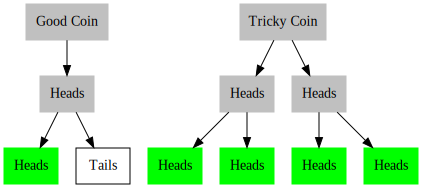

In [108]:
from graphviz import Digraph

styles = {
    'roundover': {'shape': 'rect', 'style': 'filled', 'color': 'gray'},
    'tails':  {'shape': 'rect', 'style': 'filled', 'color': 'red'},
    'heads': {'shape': 'rect', 'style': 'filled', 'color': 'green'},
    'qst': {'shape': 'rect'}
}

round_two = Digraph()

round_two.node('q1', 'Good Coin', styles['roundover'])

round_two.node('h1', 'Heads', styles['roundover'])

round_two.node('q2', 'Tricky Coin', styles['roundover'])

round_two.node('bh1', 'Heads', styles['roundover'])
round_two.node('trick1', 'Heads', styles['roundover'])

round_two.node('h2', 'Heads', styles['qst'])
round_two.node('t2', 'Tails', styles['qst'])

round_two.node('bh2', 'Heads', styles['qst'])
round_two.node('trick2', 'Heads', styles['qst'])

round_two.node('bh12', 'Heads', styles['qst'])
round_two.node('trick12', 'Heads', styles['qst'])


round_two.edge('q1', 'h1')

round_two.edge('q2', 'bh1')
round_two.edge('q2', 'trick1')

round_two.edge('bh1', 'bh2')
round_two.edge('bh1', 'trick2')

round_two.edge('trick1', 'bh12')
round_two.edge('trick1', 'trick12')

round_two.edge('h1', 'h2')
round_two.edge('h1', 't2')

run: "auto"
flipcoin = "heads" #@param ["heads", "tails"]
if flipcoin == 'heads':
  round_two.node('bh2', 'Heads', styles['heads'])
  round_two.node('bh12', 'Heads', styles['heads'])
  round_two.node('h2', 'Heads', styles['heads'])
  round_two.node('trick2', 'Heads', styles['heads'])
  round_two.node('trick12', 'Heads', styles['heads'])
  round_two.node('t2', 'Tails', styles['qst'])
elif flipcoin == 'tails':
  round_two.node('t2', 'Tails', styles['tails'])
  round_two.node('bh2', 'Heads', styles['qst'])
  round_two.node('bh12', 'Heads', styles['qst'])
  round_two.node('h2', 'Heads', styles['qst'])
  round_two.node('trick2', 'Heads', styles['qst'])
  round_two.node('trick12', 'Heads', styles['qst'])

round_two

###What would the probability be?

Again, we want to know the probability of "goodCoin" given "calledHeads". But, we have *even more information* this time around, because we've collected new evidence.

$$ P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$

* We know that **P(B|A)** is equal to $\frac{1}{2}$ because the likelihood of calling heads *given that* we have the good coin is 50%. That factor hasn't changed.

* We know that **P(A)** is equal to $\frac{1}{2}$ because the likelihood that we have the good coin rather than the tricky coin is 50%. Again, this factor hasn't changed - we still only have two coins to choose from.

* We know that **P(A)** is equal to $\frac{5}{6}$ because the likelihood the overall number of heads we *could have called* versus the total number of calls we could have made is 5 heads to 6 possible calls (~83%). 


Let's try it out in our formula:

$$P(A|B) = \frac{.5*.5}{.8333}$$

Or:

$$P(A|B) = .20 = \frac{1}{5}$$

# A little more complex...

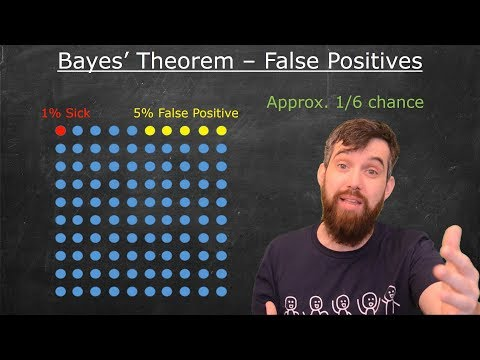

In [104]:
#@title The Next Step with Bayes' { display-mode: "form" }
#@markdown Take another couple minutes with Trefor to learn how we can extend our knowledge of Bayes' to the next level.
from IPython.display import YouTubeVideo
YouTubeVideo('HaYbxQC61pw', width=600, height=400)

##Let's try this with an example of our own...
---

At the beginning, we talked about heading upstairs really quietly because we didn't want to wake any sleeping kids. Our initial assumption (*prior*) was built around our knowledge of the *time* against the likelihood that our children were asleep.

* Let's assume that, for the time 10pm, we know there's a 75% chance that the kids are asleep.

**But now** we have new information - about giggling! Based on prior observation, we can say that, if we know the kids are asleep, there's a 99% chance there's no giggling. (*We'll leave a 1% wiggle room for sleep-giggling and/or YouTube clips left on in the room.*)

That means:

$$ -giggles = .99$$
$$ giggles = .01$$

###Simple enough, right?
Yes, and no. Like in Trefor's video, it's possible here, too, to have a false positive. You may hear *no giggling* but the kids might still *be awake*. For that, we have to make another assumption. 

Based on our past experience peering into their room at night, we know that there's about an 80% chance that, if they're awake, they're giggling. That means that there's a 20% chance they're awake and *not giggling.*  We, too, can expand Bayes' Rule to encompass a false positive:

$$ P(A|B) = \frac{P(B|A)*P(A)}{P(B|A)*P(A) + P(B|~A)*P(~A)}$$

Or, in our terms:

$$P(asleep|~giggling) = \frac{P(~giggling|asleep)*P(asleep)}{P(~giggling|asleep)*P(asleep) + P(~giggling|~asleep)*P(~asleep)}$$

![Laughing](https://giphy.com/gifs/reJOGQ43nNeGk/html5)

###Let's Try It Out!
Let's take everything we've learned and figure out how likely it is that those kids actually are sleeping, given that we hear giggling at 10pm.

To solve, let's recollect our data in one place:
* At 10pm, there is a 75% chance the kids are asleep.
* Given that the kids are asleep, there is a 99% chance there is no giggling.
* Given that the kids are awake, there is an 80% chance they're giggling.

$$ P(A|B) = \frac{P(B|A)*P(A)}{P(B|A)*P(A) + P(B|~A)*P(~A)}$$

Now we simply plug in our terms:

$$ P(asleep|giggling) = \frac{.01*.75}{.01*.75 + .8*.25}$$

Simplified into:

$$ P(asleep|giggling) = \frac{.0075}{.2075} = .036$$

**Stated simply, there is only a 3.6% chance your kids are asleep at 10pm if you hear giggling.**




![Sleepy](https://giphy.com/gifs/h7DyKGq716JMI/html5)

###Now You!
---
Given what we've assumed above, how likely is it that the kids are **asleep** given that **we do not hear giggling**?

Take a few minutes and try this on your own, then click below for the solution.

###Solution

Click below for solution.

In [0]:
#Task: It's 10pm - how likely is it that the kids are asleep given that we do not hear giggling?

# P(asleep | ~giggling) = P(~giggling | asleep )*P(asleep) / (P(~giggling|asleep)*P(asleep)+ P(~giggling | ~asleep)*P(~asleep))
# P(asleep | ~giggling) = (.99*.75)/(.99*.75 + .2*.25)
# P(asleep | ~giggling) = .7425/.7925 = .9369

# Stated plainly, there is a 93.69% chance the kids are asleep at 10pm given that you do not hear giggling.